In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
x = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
y = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

## Plot data points

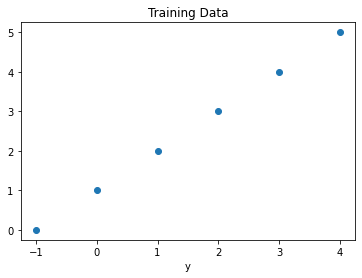

In [3]:
plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("Training Data")
plt.show()

## Initialise random line

In [4]:
gradient = tf.Variable(tf.zeros(1))
c = tf.Variable(tf.random.normal([1], 0, 1, tf.float32))

def line(x):
    y = gradient * x + c
    return y

## Mean Squared Error (MSE)

In [5]:
def mse(data, pred):
    sum_of_differences = 0
    for i in range(len(data)):
        diff = data[i] - pred[i]
        squared_diff = diff ** 2
        sum_of_differences += squared_diff
    mse = sum_of_differences / len(data)
    return mse

## Train Model

In [6]:
epochs = 100 # epochs are the number of times to train model on training data
learning_rate = 0.01

In [7]:
# train 'model'
for epoch in range(epochs):
    with tf.GradientTape(persistent=True) as tape: # GradientTape takes note of what to record
        # generate line
        y_predicted = line(x)
        # calculate mse
        loss = mse(y, y_predicted)

        # tape records gradients
        gradients = tape.gradient(loss, [gradient, c])

        # subtract gradients * learning rate from gradient and c (following equation in notes)
        # eventually gradient and c become closer to actual value
        gradient.assign_sub(gradients[0] * learning_rate)
        c.assign_sub(gradients[1] * learning_rate)

    # print(f"Epoch {epoch}: Loss value: {loss.numpy()}")

print(f"Completed {epochs} epochs! Loss value = {loss.numpy()}")

Completed 100 epochs! Loss value = 0.051148369908332825


## Results
Actual equation is y = x + 1

In [8]:
print(f"Resulting line is y = {float(gradient)}x + {float(c)}") 

Resulting line is y = 1.0956255197525024x + 0.7035027146339417


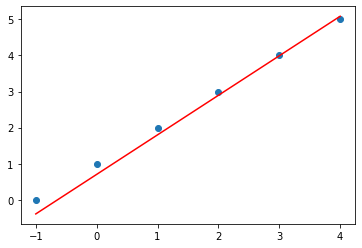

In [9]:
plt.scatter(x, y)
plt.plot(x, line(x), 'r')
plt.show()